In [1]:
pwd


u'/Users/zhangjun'

In [2]:
import json
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
%matplotlib inline

In [4]:
tweets_data_path = '/Users/zhangjun/cod/twitter_data.txt'

tweets_data = []
tweets_file = open(tweets_data_path, "r")
for line in tweets_file:
    try:
        tweet = json.loads(line)
        tweets_data.append(tweet)
    except:
        continue

In [5]:
print len(tweets_data)

1094


In [6]:
tweets = pd.DataFrame()

In [7]:
tweets['text'] = map(lambda tweet: tweet['text'], tweets_data)
tweets['lang'] = map(lambda tweet: tweet['lang'], tweets_data)
tweets['country'] = map(lambda tweet: tweet['place']['country'] if tweet['place'] != None else None, tweets_data)

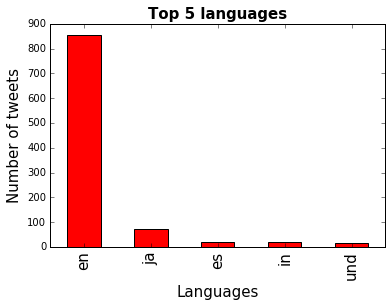

In [8]:
tweets_by_lang = tweets['lang'].value_counts()

fig, ax = plt.subplots()
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=10)
ax.set_xlabel('Languages', fontsize=15)
ax.set_ylabel('Number of tweets' , fontsize=15)
ax.set_title('Top 5 languages', fontsize=15, fontweight='bold')
tweets_by_lang[:5].plot(ax=ax, kind='bar', color='red')

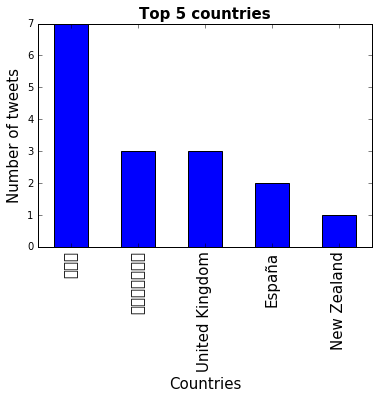

In [9]:
tweets_by_country = tweets['country'].value_counts()

fig, ax = plt.subplots()
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=10)
ax.set_xlabel('Countries', fontsize=15)
ax.set_ylabel('Number of tweets' , fontsize=15)
ax.set_title('Top 5 countries', fontsize=15, fontweight='bold')
tweets_by_country[:5].plot(ax=ax, kind='bar', color='blue')

In [10]:
import re

In [11]:
def word_in_text(word, text):
    word = word.lower()
    text = text.lower()
    match = re.search(word, text)
    if match:
        return True
    return False

In [12]:
tweets['python'] = tweets['text'].apply(lambda tweet: word_in_text('python', tweet))
tweets['javascript'] = tweets['text'].apply(lambda tweet: word_in_text('javascript', tweet))
tweets['ruby'] = tweets['text'].apply(lambda tweet: word_in_text('ruby', tweet))

In [13]:
print tweets['python'].value_counts()[True]
print tweets['javascript'].value_counts()[True]
print tweets['ruby'].value_counts()[True]

277
275
477


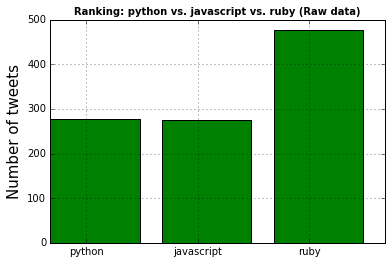

In [14]:
prg_langs = ['python', 'javascript', 'ruby']
tweets_by_prg_lang = [tweets['python'].value_counts()[True], tweets['javascript'].value_counts()[True], tweets['ruby'].value_counts()[True]]

x_pos = list(range(len(prg_langs)))
width = 0.8
fig, ax = plt.subplots()
plt.bar(x_pos, tweets_by_prg_lang, width, alpha=1, color='g')

# Setting axis labels and ticks
ax.set_ylabel('Number of tweets', fontsize=15)
ax.set_title('Ranking: python vs. javascript vs. ruby (Raw data)', fontsize=10, fontweight='bold')
ax.set_xticks([p + 0.4 * width for p in x_pos])
ax.set_xticklabels(prg_langs)
plt.grid()

In [15]:
tweets['programming'] = tweets['text'].apply(lambda tweet: word_in_text('programming', tweet))
tweets['tutorial'] = tweets['text'].apply(lambda tweet: word_in_text('tutorial', tweet))

In [16]:
tweets['relevant'] = tweets['text'].apply(lambda tweet: word_in_text('programming', tweet) or word_in_text('tutorial', tweet))

In [17]:
print tweets['programming'].value_counts()[True]
print tweets['tutorial'].value_counts()[True]
print tweets['relevant'].value_counts()[True]

24
7
28


In [18]:
print tweets[tweets['relevant'] == True]['python'].value_counts()[True]
print tweets[tweets['relevant'] == True]['javascript'].value_counts()[True]
print tweets[tweets['relevant'] == True]['ruby'].value_counts()[True]

12
14
1


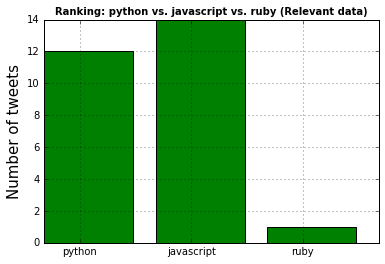

In [19]:
tweets_by_prg_lang = [tweets[tweets['relevant'] == True]['python'].value_counts()[True], 
                      tweets[tweets['relevant'] == True]['javascript'].value_counts()[True], 
                      tweets[tweets['relevant'] == True]['ruby'].value_counts()[True]]
x_pos = list(range(len(prg_langs)))
width = 0.8
fig, ax = plt.subplots()
plt.bar(x_pos, tweets_by_prg_lang, width,alpha=1,color='g')
ax.set_ylabel('Number of tweets', fontsize=15)
ax.set_title('Ranking: python vs. javascript vs. ruby (Relevant data)', fontsize=10, fontweight='bold')
ax.set_xticks([p + 0.4 * width for p in x_pos])
ax.set_xticklabels(prg_langs)
plt.grid()

In [20]:
def extract_link(text):
    regex = r'https?://[^\s<>"]+|www\.[^\s<>"]+'
    match = re.search(regex, text)
    if match:
        return match.group()
    return ''

In [21]:
tweets['link'] = tweets['text'].apply(lambda tweet: extract_link(tweet))

In [22]:
tweets_relevant = tweets[tweets['relevant'] == True]
tweets_relevant_with_link = tweets_relevant[tweets_relevant['link'] != '']

In [23]:
print tweets_relevant_with_link[tweets_relevant_with_link['python'] == True]['link']
print tweets_relevant_with_link[tweets_relevant_with_link['javascript'] == True]['link']
print tweets_relevant_with_link[tweets_relevant_with_link['ruby'] == True]['link']

23      https://t.co/Oo9VWM2py4
24      https://t.co/6lFy5FKyj0
283     https://t.co/5X4SHOVofA
546     https://t.co/kCvTstzVWW
565     https://t.co/iyAadfFWJ9
847     https://t.co/BtXlVTEEel
904     https://t.co/sVN6fv9xqP
941     https://t.co/CWIaAoofgR
962     https://t.co/1AOOhRmxJz
1001    https://t.co/eTZss1G77r
1045    https://t.co/rY1zkttio7
Name: link, dtype: object
13     https://t.co/3Y01NKKopi
118    https://t.co/gXhW46pHpU
179    https://t.co/Hd8Ihy4ij5
430    https://t.co/egP1bOSzQj
436    https://t.co/TkmeiX9fmc
653    https://t.co/egP1bOSzQj
674    https://t.co/Hd8Ihy4ij5
728    https://t.co/t4wafOrV8q
751    https://t.co/IjtqfxzPbx
772    https://t.co/92b9seLepo
808    https://t.co/Hd8Ihy4ij5
825    https://t.co/1bGfy7KyoV
Name: link, dtype: object
1008    https://t.co/i2EkqP1rXw
Name: link, dtype: object
